# ML for dummies

This notebook will show easy but practical uses of Machine learning for beginers.  
The goal is to help poeple who find the subject interesting to have handsdown examples

## Table of contents

1.  Supervised and Unsupervised (RL?)  
    a.  Anomaly detection  
2.  Intro to ML  
    a.  Loss and optimization  
    b.  GD  
3.  Regression and classification  
    a.  Linear regression  
    b.  SVM, logistic  
4.  Clustering  
    a.  KNN & k-means  
5.  NN  
    a.  Perceptron  
    b.  Sigmoid, ReLU, tanh, etc.  
    c.  From Perceptron to a network  
    d.  Loss -\> Derivation -\> Update  
    e.  Dense, Conv, RNN  
6.  Summery  
    a.  Real world examples  
        1) YOLO
        2) BERT
        3) Deepfake (GANs)

In [27]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt


In [24]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score

In [85]:
# sklean comes with tens of databsets to learn from
# we will use the diabetes data set
X, y = datasets.load_diabetes(return_X_y=True)
y[0]

151.0

## Diabetes dataset
Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of `n = 442` diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

For example `X[0]` has the following values  

| Age | Sex | Body mass index | Average blood pressure | S1 | S2 | S3 | S4 | S5 | S6 |  
|------|------|------|------|------|------|------|------|------|------|
|0.0381|0.0507|0.0617|0.0219|-0.0442|-0.0348|-0.0434|-0.0026|0.0199|-0.0176|

While the target `y[0]`

| measure of disease progression |
|------|
| 151.0| 

An important thing to notice is the data is already normalized. We should alway work with normalized data

In [73]:
# Now we shape our data to be simple and easy to explore
# We use the `shape` attribute to understand the data we want to learn from
print(X.shape)
print(X[:,2].shape)

# We can use the reshape the data using slicing and `reshape` method
X = X[:,2].reshape(-1, 1)
print(X.shape)

# Now we use a great util from sklearn which helps us to split the data randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Exmaple for a the data set values: \n', X_train[0])

(442, 10)
(442,)
(442, 1)
Exmaple for a the data set values: 
 [-0.03099563]


In [74]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficients: 
 [972.87627375]
Mean squared error: 3934.07
Coefficient of determination: 0.32


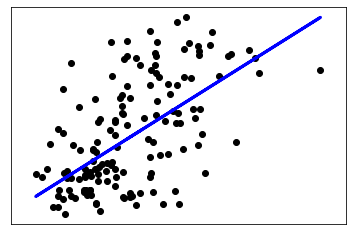

In [75]:
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.close()
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()